# Projeto SiDi - Resolução de Entidade

## Scraper

In [1]:
import requests
import pandas as pd
import re
import time

from bs4 import BeautifulSoup

In [41]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            #'Accept-Language': 'en-US, en;q=0.5',
            "Accept-Encoding":"gzip, deflate",
            "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
            "DNT":"1","Connection":"close",
            "Upgrade-Insecure-Requests":"1"})

COOKIES = {'B2W-IU': "false",
           'B2W-PID': "1651847762544.0.6337384078925419",
           'B2W-SID': "1651847762544.0.8031766302150463",
           'B2W-UID': "va_1651847762544.0.9073112643781021",
           'MobileOptOut': "1",
           '_ga': "GA1.3.1637195159.1651847785",
           '_ga_DFEPZNP57H': "GS1.1.1651847785.1.0.1651847785.60",
           '_gat_UA-97626372-1': "1",
           '_gcl_au': "1.1.451393762.1651847784",
           '_gid': "GA1.3.361546463.1651847785",
           '_hjAbsoluteSessionInProgress': "0",
           '_hjFirstSeen': "1",
           
           '_hjSessionUser_369648': "eyJpZCI6ImM2ZjljM2ZjLTJlOTgtNWY2MC1iZjRmLWZmMTQxMmEzNWI2OSIsImNyZWF0ZWQiOjE2NTE4NDc3ODQ4OTcsImV4aXN0aW5nIjpmYWxzZX0=",
           '_hjSession_369648': "eyJpZCI6Ijk2MjFkZmY3LTVmNTMtNDcxMy05Njc0LTc3OTA4MDY1YTFiMyIsImNyZWF0ZWQiOjE2NTE4NDc3ODQ5NTcsImluU2FtcGxlIjpmYWxzZX0=",
           '_px3': "da8aa9ea63f35fac0bdab39fc1f40d45e38f5678636016ac51f3b1a656315a0b:0Lc40QZFtSQpz9W7F1I/FogDtHvxszj8IvJDwc7dyjK5AER4bjP3ghDRCa6OSfpqHGb5gcstwLc0ogajI/F1HA==:1000:aVSSq5lxjbkaLNKsQmRL99td5E0gVyVTaU8lQwjew94WdzlOzZB7vg3tvYcclZeDLp0T9a7OyEr7B8G/c5zlojtAbGFONbAGPL5cUYmalPDYIyU4GLmz/Arc0ba3ChF6A0GcGUVL2dQ9ciBbPAkeZeDvDPLI4SqlvNj0Diij78a5Wd2pBdWLelu7jO9CZqROEhnIemW6Iu1kEcSCeRhw7A==",
           '_px_f394gi7Fvmc43dfg_user_id': "ZDkyYzA0NTAtY2Q0OS0xMWVjLTkwZmItMDNjYzg0NWVjZmY1",
           '_px_uAB': "MTI4OTV8dHJ1ZQ==",
           '_pxvid': "daaf393c-cd49-11ec-a5d6-67456e515a65",
           'ak_bmsc': "40B3B868037F4C347D89BA771D5073A5~000000000000000000000000000000~YAAQXzm5s2B3F46AAQAAxO7MmQ94ARRFG/zMMsKvIx43W0tE7J+iakJaILDi+h8qdG4wwYz4WExCbYehBLvIX4OWei4Y4WqfGSenwj/9hfNkYTNNTWxRb+y6dqqPMSJQ7nJO1ctWCRMBEX6pOsqOYzpssg5ZYODAwlbxZGfBKbq6Dv8pH9yvCDmkYnC/rcHww7CcokDLyx1fep77Jfo/GUoGXOabpmC3/324vFgArboJULzI8k8aad3/tnq0zcruWWDT1oEAgJihWK0cCPwv6ybgJP9XoAWMBLffJPHk7HEKNMEnoKzGfezJbwWsrJun3J+0JD8QY7kHDGRBY3h+C/kYn5h5nn1z3ZREyx8YaJ0wbHXacZ/Nn5/qWUIfoh4tpcIgrxAFr0mT/mvqTZU1Z+7t5qAzlvLFI13Rtqzsmfna/3CvXwyGtYfPaQK4vUZU6yT82BeB",
           'b2wChannel': "ACOM",
           'b2wDevice': "eyJvcyI6IldpbmRvd3MgTlQiLCJvc1ZlcnNpb24iOiIxMC4wIiwidmVuZG9yIjoiQ2hyb21lIiwidHlwZSI6ImRlc2t0b3AiLCJta3ROYW1lIjoiQ2hyb21lIDEwMSIsIm1vZGVsIjoiMTAxIiwibW9iaWxlT3B0T3V0IjoiZmFsc2UifQ==",
           'b2wDeviceType': "desktop",
           'bm_mi': "61BD17B1915EBB45AE6398700B7CF10D~YAAQXzm5s0B3F46AAQAAw+vMmQ8XSImDoRMc7ayQFOv+iwLyn+ksPQ9gK5o5CXSaQIep8D3CVTkzQzk5LMo7nyT2Ljt/oedmqdeOlmXrhj2REUZyjx76c+LLTs4M81eSlu2qXlW3TIUMtDhmLKzVHQEI4coQyMENdqEEgItsn/XIPi5hwpkpNSGKuTMw51wOq/zwpMgR1myvQxZsVZ1TvcBvmEJiIqhaXnI2GLUpjiCpVAQkSk9x5caNt0/LPtZhDN9mdS5VScbjVepbxcAGfe/rGCS7eplxba7ycI6/q+7u0aYsk6Y1+GZXrE303EoMK9BMHOc=~1",
           'bm_sv': "F1518CEBA45B0884BC3A7B2F2140F9BE~YAAQXzm5s0F3F46AAQAAw+vMmQ8HocdUWVLnApC0dnxBmG3pYJmrMhKePDP1mtf43VC2Ak6MX9X/Gl7gw7+UjGn6e+eEkSbopaf0E77kN/5PVsfveMuUwhVEyojGF/xeiXC9hpIHptHn/lxNmyeXNaxUYhJVI1PRWH6snFvc418pHZQi84pNjvZfiNpLygnr1tHVddB9j/3wDMhGiZ7HV4ncD6YhuNxDEMrLWQrrz2m8PYpD6iDUBPYQu3kNfJcCcRSJo8ngEw==~1",
           
           'catalogTestAB': "old",
           'cdn-city': "SALVADOR",
           'cdn-country': "BR",
           'cdn-lat': "-12.98",
           'cdn-long': "-38.52",
           'cdn-region': "BA",
           'cto_bundle': "w80Kl8xaDkyZUElMkZaZHhNdVgxVmo3bGJjTVVQTDd5UTJhYmw1VFBpYnY4WmxnVDg5U2V6VFNJd3NtME9jVGM1SERSb0VkMyUyRmM2ZlpvYjN0MTYzUnVRa3dmeXhLendKQ1gxUHhFRkRNRGpzUlpLYW4lMkJuWVRSUGQ1ZHowMXRibUJBRG9tTFppNUt0dDlvSXNDZENiaDA2TWZCUkNFREtjdW1nQWVBOWZuMVRKS3plNnclM0Q",
           'legionRegion': "929000",
           'macroRegion': "NORTHEAST_CAPITAL",
           'mesoRegion': "2901",
           'pxcts': "daaf4897-cd49-11ec-a5d6-67456e515a65",
           'searchTestAB': "out",
           
           '_dd_s': "rum=0&expire=1651848797883"
           }

def getdata(url):
    r = requests.get(url, headers = HEADERS, cookies = COOKIES)
    return r.text

def html_code(url):
  
    # pass the url
    # into getdata function
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
  
    # display html code
    return (soup)

In [5]:
def cus_data(soup):
    # find the Html tag
    # with find()
    # and convert into string

    cus_list= []

    for item in soup.find_all("div", class_="a-section celwidget"):
        review = item.find("span", class_="a-size-base review-text review-text-content").get_text()
        date = item.find("span", class_="a-size-base a-color-secondary review-date").get_text()
        stars = item.find("span", class_="a-icon-alt").get_text()
        
        cus_list.append((review, stars, date))

    return cus_list

In [60]:
'''links = []
for paginacao in range(1, 84):
    
    if paginacao < 43:
        continue
    
    url = f"https://www.americanas.com.br/categoria/celulares-e-smartphones/smartphone?viewMode=list&limit=24&offset={paginacao*24}"
    
    soup = html_code(url)

    lista_divs = soup.find_all("div", {"class": "src__Wrapper-sc-1wgxjb2-0 dUUAKQ"})

    for div in lista_divs:
        for link in div.findAll('a', attrs={'href': re.compile("^/")}):
            links.append(f"https://www.americanas.com.br{link.get('href')}")
                        
links = list(set(links))
'''

In [62]:
#df = pd.DataFrame(links, columns = ['links'])
#df.to_csv('Dados/americanas_links_2.csv', index = False)

In [76]:
df_links = pd.read_csv('Dados/americanas_links.csv')

In [42]:
lista_produtos = []
for i, url in enumerate(df_links['links']):
    
    for j in range(10):
        
        soup = html_code(url)
    
        titulo = soup.find("h1", {"class": "product-title__Title-sc-1hlrxcw-0 jyetLr"})
        if titulo is not None:
            titulo = titulo.text.strip()   
            break
            
        time.sleep(10)
        
    tabela = soup.find("table", {"class": "src__SpecsCell-sc-70o4ee-5 gYhGqJ"})
    ean = re.findall(r'Código de barras</td><td class="spec-drawer__Text-sc-jcvy3q-5 fMwSYd">([0-9]+)|$', str(tabela))[0]
    
    descricao = soup.find("div", {"class": "src__Description-sc-13f3i2j-2 bqnMru"})
    
    if descricao is not None:
        descricao = descricao.text.strip()
    
    lista_produtos.append((url, titulo, ean, descricao))
    
    time.sleep(10)

In [55]:
soup.find("div", {"class": "src__Description-sc-13f3i2j-2 bqnMru"}).text

'O Samsung Galaxy A03s é um smartphone projetado para oferecer o que você mais precisa para se conectar: tecnologia e agilidade. Ideal para você que valoriza cada momento e precisa dos melhores itens ao seu lado, essa novidade da Samsung vai surpreender. Com o design moderno, seu desempenho é incrível e conta com recursos de câmera impressionantes. Alie modernidade e tecnologia em um único aparelho. Tecnologia nas suas mãos Com tecnologia da nova geração de smartphones da Samsung conta com processador Octa-Core 2.3GHz, que oferece ótima eficiência para as suas atividades do dia a dia, seja para curtir os seus vídeos preferidos ou até mesmo os filmes. Outro diferencial, é a sua tela lcd tft com 6.5, com ótima qualidade de cores e performance. Qualidade que você precisa Além de contar com o design moderno e ser um diferencial que não pode faltar, possui câmera tripla traseira de 13MP + 2MP + 2MP, perfeita para fazer fotos maravilhosas, em diversos momentos do dia. Já a selfie é de 5MP, i

In [48]:
url

'https://www.americanas.com.br/produto/1611315933?pfm_page=search&pfm_pos=grid&pfm_type=search_page'


<!DOCTYPE html>

<html lang="pt-BR">
<head>
<title data-react-helmet="true">iPhone 11 Apple (64GB) Preto Tela 6,1" 4G Câmera 12MP iOS em Promoção | Ofertas na Americanas</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<meta ,="" content="yes" name="mobile-web-app-capable"/>
<meta charset="utf-8"/>
<meta content="3.0.370" name="version"/>
<link crossorigin="" href="www.google-analytics.com" rel="dns-prefetch"/>
<link crossorigin="" href="www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://images-americanas.b2w.io/catalog-statics/acom/favicon-americanas.ico" rel="shortcut icon" sizes="16x16"/>
<meta content='iPhone 11 Apple (64GB) Preto Tela 6,1" 4G Câmera 12MP iOS em promoção na Americanas. Encontre as melhores ofertas e os melhores preços, com entrega rápida. Vem!' data-react-helmet="true" name="description"/><meta content="app-id=com.b2w.americanas" data-react-helmet="
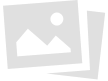

In [51]:
soup

In [212]:
df_produtos = pd.DataFrame(lista_produtos, columns = ['url', 'titulo', 'ean'])

In [213]:
df_produtos['titulo'] = df_produtos['titulo'].astype('string')
df_produtos['ean'] = df_produtos['ean'].astype('string')

In [215]:
df_produtos.to_csv("Dados/produtos_americanas.csv", index = False)